In [1]:
import matplotlib.pyplot as plt
from shapely.geometry import LineString, Polygon, Point
import numpy as np

from pathlib import Path

from asim.dataset.maps.gpkg.gpkg_map import GPKGMap

from asim.common.visualization.maps.plot_maps import _plot_map_on_ax
from asim.common.geometry.base import Point2D
from asim.dataset.maps.map_datatypes import MapSurfaceType



name = "us-pa-pittsburgh-hazelwood"
name = "carla_town03"
map_file_path = Path(f"/home/daniel/asim_workspace/asim/notebooks/{name}.gpkg")

map_api = GPKGMap(map_file_path)
map_api.initialize()

/home/daniel/asim_workspace/asim/asim/dataset/maps/gpkg/gpkg_map.py:70: UserWarning: GPKGMap: intersection not available in /home/daniel/asim_workspace/asim/notebooks/carla_town03.gpkg
  warnings.warn(f"GPKGMap: {map_layer_name} not available in {str(self._file_path)}")
/home/daniel/asim_workspace/asim/asim/dataset/maps/gpkg/gpkg_map.py:70: UserWarning: GPKGMap: crosswalk not available in /home/daniel/asim_workspace/asim/notebooks/carla_town03.gpkg
  warnings.warn(f"GPKGMap: {map_layer_name} not available in {str(self._file_path)}")


In [8]:
map_api._gpd_dataframes[MapSurfaceType.LANE]

,id,lane_group_id,predecessor_ids,successor_ids,left_boundary,right_boundary,baseline_path,geometry
0,0,199,[],[233],LINESTRING Z (140.78318722083048 199.217936666...,LINESTRING Z (140.87111491274527 202.716832023...,LINESTRING Z (140.82715106678788 200.967384345...,"POLYGON ((97.387 200.308, 98.373 200.284, 99.3..."
1,1,199,[],[234],LINESTRING Z (140.87111491274527 202.716832023...,LINESTRING Z (140.95904260466006 206.215727380...,LINESTRING Z (140.91507875870266 204.466279702...,"POLYGON ((97.475 203.807, 98.461 203.783, 99.4..."
2,2,284,[231],[226],LINESTRING Z (97.29896025512201 196.8095959109...,LINESTRING Z (97.21103256320721 193.3107005536...,LINESTRING Z (97.25499640916462 195.0601482323...,"POLYGON ((140.695 195.719, 139.709 195.744, 13..."
3,3,284,"[235, 232]","[229, 225]",LINESTRING Z (97.21103256320721 193.3107005536...,LINESTRING Z (97.12310487129241 189.8118051964...,LINESTRING Z (97.1670687172498 191.56125287506...,"POLYGON ((140.607 192.22, 139.621 192.245, 138..."
4,4,185,[233],"[242, 239]",LINESTRING Z (71.66500864930101 200.9548854147...,LINESTRING Z (71.75293634121581 204.4537807720...,LINESTRING Z (71.70897249525842 202.7043330933...,"POLYGON ((20.771 202.234, 21.769 202.209, 22.7..."
...,...,...,...,...,...,...,...,...
412,412,153,[127],[152],LINESTRING Z (-36.248021887598384 -179.7891049...,LINESTRING Z (-38.19144265299083 -176.87824328...,LINESTRING Z (-37.21973227029461 -178.33367413...,"POLYGON ((-63.2 -187.306, -62.465 -187.954, -6..."
413,413,40,[147],[151],LINESTRING Z (-33.15825786724541 -198.86380482...,LINESTRING Z (-33.166991026921295 -195.3638157...,LINESTRING Z (-33.16262444708335 -197.11381027...,"POLYGON ((-65.514 -189.932, -64.84 -190.512, -..."
414,414,40,[148],[152],LINESTRING Z (-33.166991026921295 -195.3638157...,LINESTRING Z (-33.17572418659718 -191.86382661...,LINESTRING Z (-33.17135760675924 -193.61382117...,"POLYGON ((-63.2 -187.306, -62.591 -187.829, -6..."
415,415,203,[153],[149],LINESTRING Z (-67.82821570149261 -192.55782504...,LINESTRING Z (-70.14238010631719 -195.18359028...,LINESTRING Z (-68.9852979039049 -193.870707662...,"POLYGON ((-33.15 -202.364, -34.125 -202.366, -..."


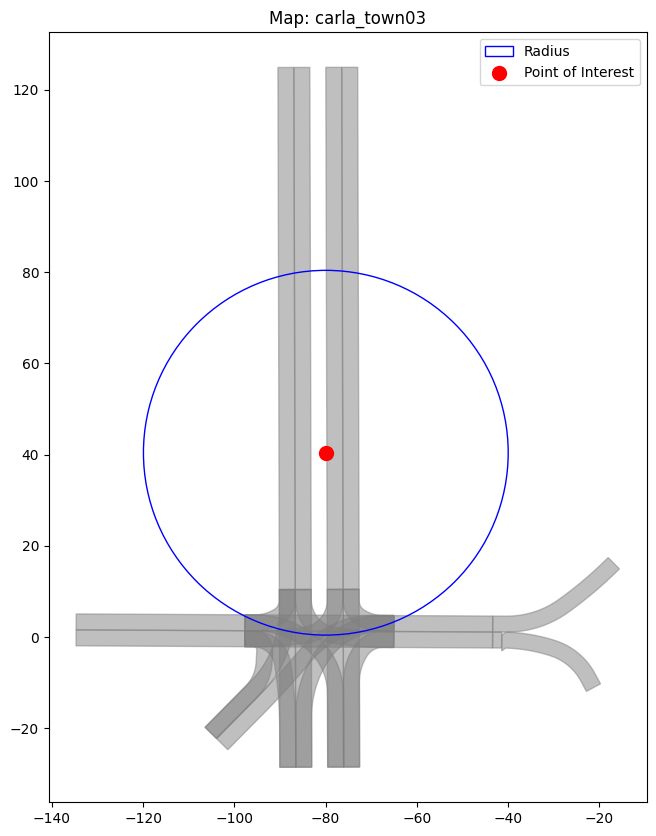

In [9]:
from matplotlib.patches import Circle


radius=40.0
point_2d = Point2D(-79.9494029860944, 40.4132276919305)

fig, ax = plt.subplots(figsize=(10, 10))
_plot_map_on_ax(ax, map_api, point_2d, radius=radius)

# Add a circle with the specified radius
circle = Circle((point_2d.x, point_2d.y), radius=radius, color="blue", fill=False, label="Radius")
ax.add_patch(circle)

# Highlight the point of interest
ax.scatter(point_2d.x, point_2d.y, color="red", s=100, label="Point of Interest")

ax.set_aspect("equal", adjustable="box")
ax.legend()

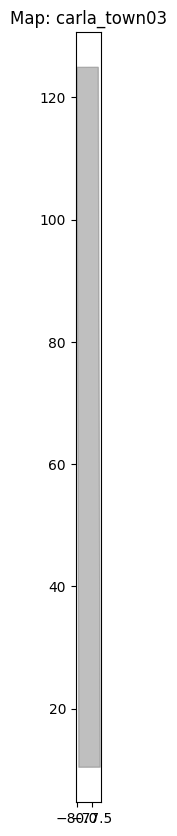

In [4]:
fig, ax = plt.subplots(figsize=(10, 10))

_plot_map_on_ax(ax, map_api, point_2d, radius=2)

ax.set_aspect("equal", adjustable="box")


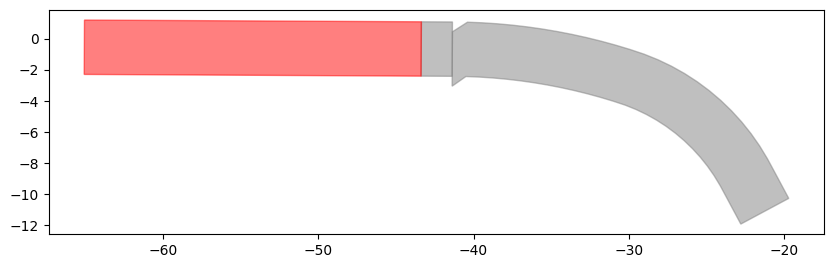

In [5]:
import ast

def plot_lane(ax, lane, color):
    ax.fill(*lane.shapely_polygon.exterior.xy, color=color, alpha=0.5)


map_objects_dict = map_api.get_proximal_map_objects(point_2d, radius=radius, layers=[MapSurfaceType.LANE_GROUP])
lane = map_objects_dict[MapSurfaceType.LANE_GROUP][3]

fig, ax = plt.subplots(figsize=(10, 10))


plot_lane(ax, lane, color="grey")

for lane_ in lane.successors:
    plot_lane(ax, lane_, color="green")

for lane_ in lane.predecessors:
    plot_lane(ax, lane_, color="red")

# ax.set_aspect("equal", adjustable="box")



lane = map_objects_dict[MapSurfaceType.LANE_GROUP][1]

# fig, ax = plt.subplots(figsize=(10, 10))


plot_lane(ax, lane, color="grey")

for lane_ in lane.successors:
    plot_lane(ax, lane_, color="green")

for lane_ in lane.predecessors:
    plot_lane(ax, lane_, color="red")

ax.set_aspect("equal", adjustable="box")

In [6]:
lane._lane_row

AttributeError: 'GPKGLaneGroup' object has no attribute '_lane_row'